In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
!git clone https://github.com/rheadoshi/PRML
dataset = pd.read_csv("Data\healthcare-dataset-stroke-data.csv")
dataset.head()

# !git clone 'https://github.com/rheadoshi/PRML'
# dataset = pd.read_csv('/content/PRML/healthcare-dataset-stroke-data.csv')
# dataset.head()

'git' is not recognized as an internal or external command,
operable program or batch file.


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# Data Visualisation

In [4]:
# generating pull request
dataset.shape

(5110, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


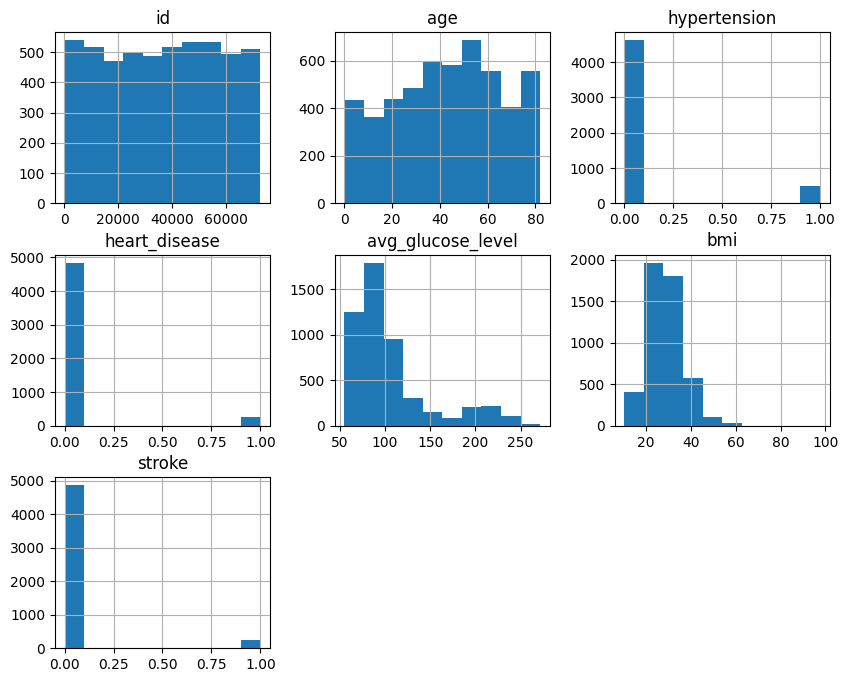

In [6]:
dataset.hist(figsize=(10, 8))
plt.show()

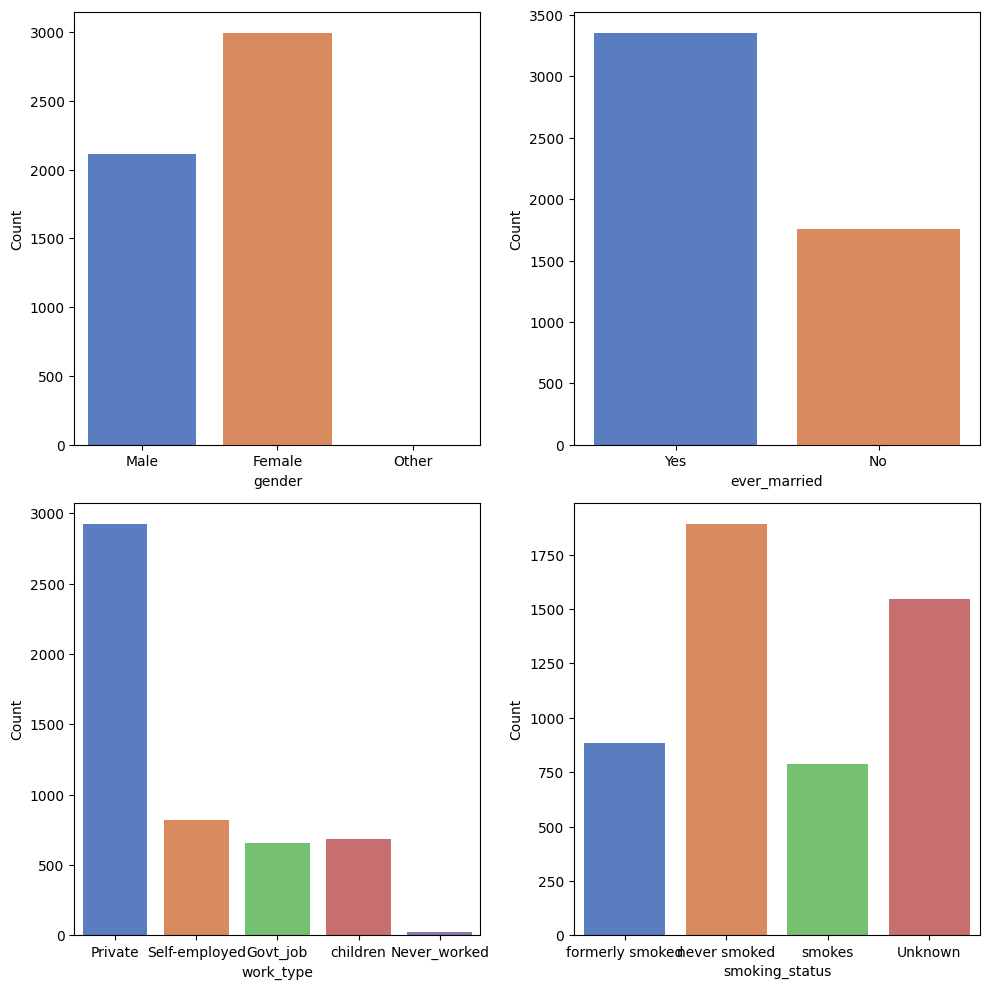

In [7]:
plt.figure(figsize=(10,10))
plotnumber = 1
columns = ['gender', 'ever_married','work_type','smoking_status']

for col in columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.countplot(x=col, data=dataset, palette='muted')
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data Pre-Processing

Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status','stroke']
le = LabelEncoder()
for col in cols:
    dataset.loc[:,col] = le.fit_transform(dataset.loc[:,col])
    dataset[col] = dataset[col].astype(int)
dataset=dataset.drop(columns=['id'])
dataset.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21   NaN               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 319.5 KB


We can see some data is missing for bmi feature. So to fill in the that data, we can find average value of bmi grouping them by gender and age.  


In [10]:
# Creating a new column 'Age_class' based on age ranges
dataset['Age_class'] = dataset['age'].apply(lambda x: 1 if x < 25 else (2 if x < 50 else 3))


In [11]:
print((dataset.groupby(['gender', 'Age_class'])['bmi'].agg(['mean'])))

                       mean
gender Age_class           
0      1          23.714660
       2          30.653965
       3          30.568066
1      1          22.603565
       2          31.305913
       3          30.776571
2      2          22.400000


In [12]:
dataset["bmi"] = dataset["bmi"].fillna(-1)
for i in range(dataset.shape[0]):
  if dataset.loc[i,'bmi']==-1:
    if dataset.loc[i,'Age_class']==1:
      if dataset.loc[i,'gender']==0:
        dataset.loc[i,'bmi']=23.71
      else:
        dataset.loc[i,'bmi']=22.60
    elif dataset.loc[i,'Age_class']==3:
      if dataset.loc[i,'gender']==0:
        dataset.loc[i,'bmi']=30.57
      else:
        dataset.loc[i,'bmi']=30.78
    else:
      if dataset.loc[i,'gender']==0:
        dataset.loc[i,'bmi']=30.65
      elif dataset.loc[i,'gender']==1:
        dataset.loc[i,'bmi']=31.31
      else:
        dataset.loc[i,'bmi']=22.4

In [13]:
dataset.drop(columns=['Age_class'],inplace = True)
print(((dataset.isna().sum())/dataset.shape[0])*100)


gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


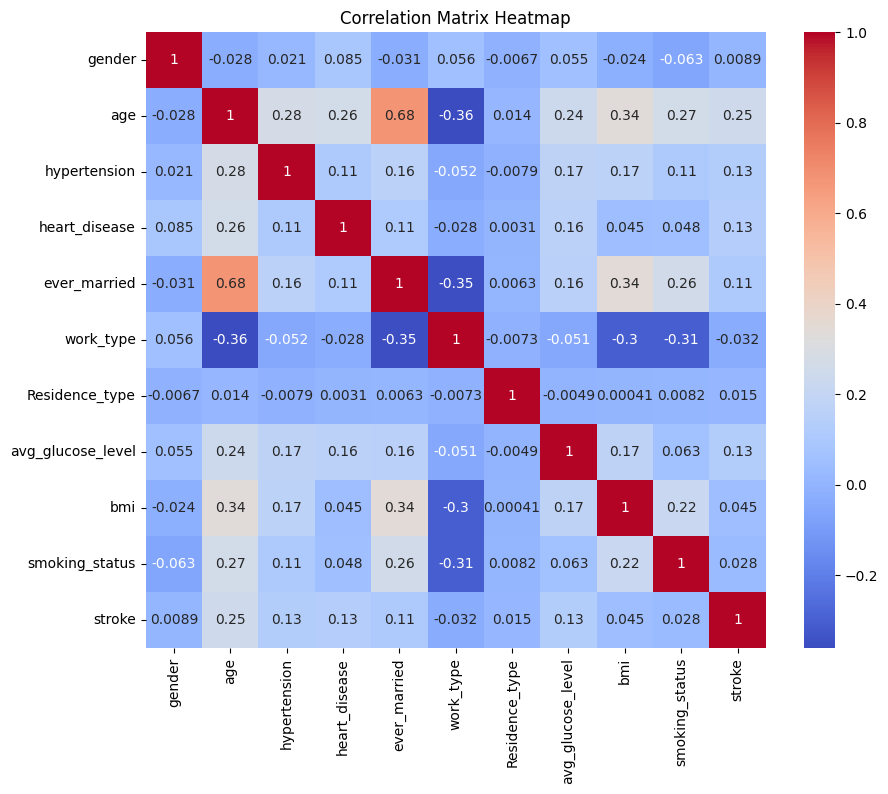

In [14]:
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Handling Outliers

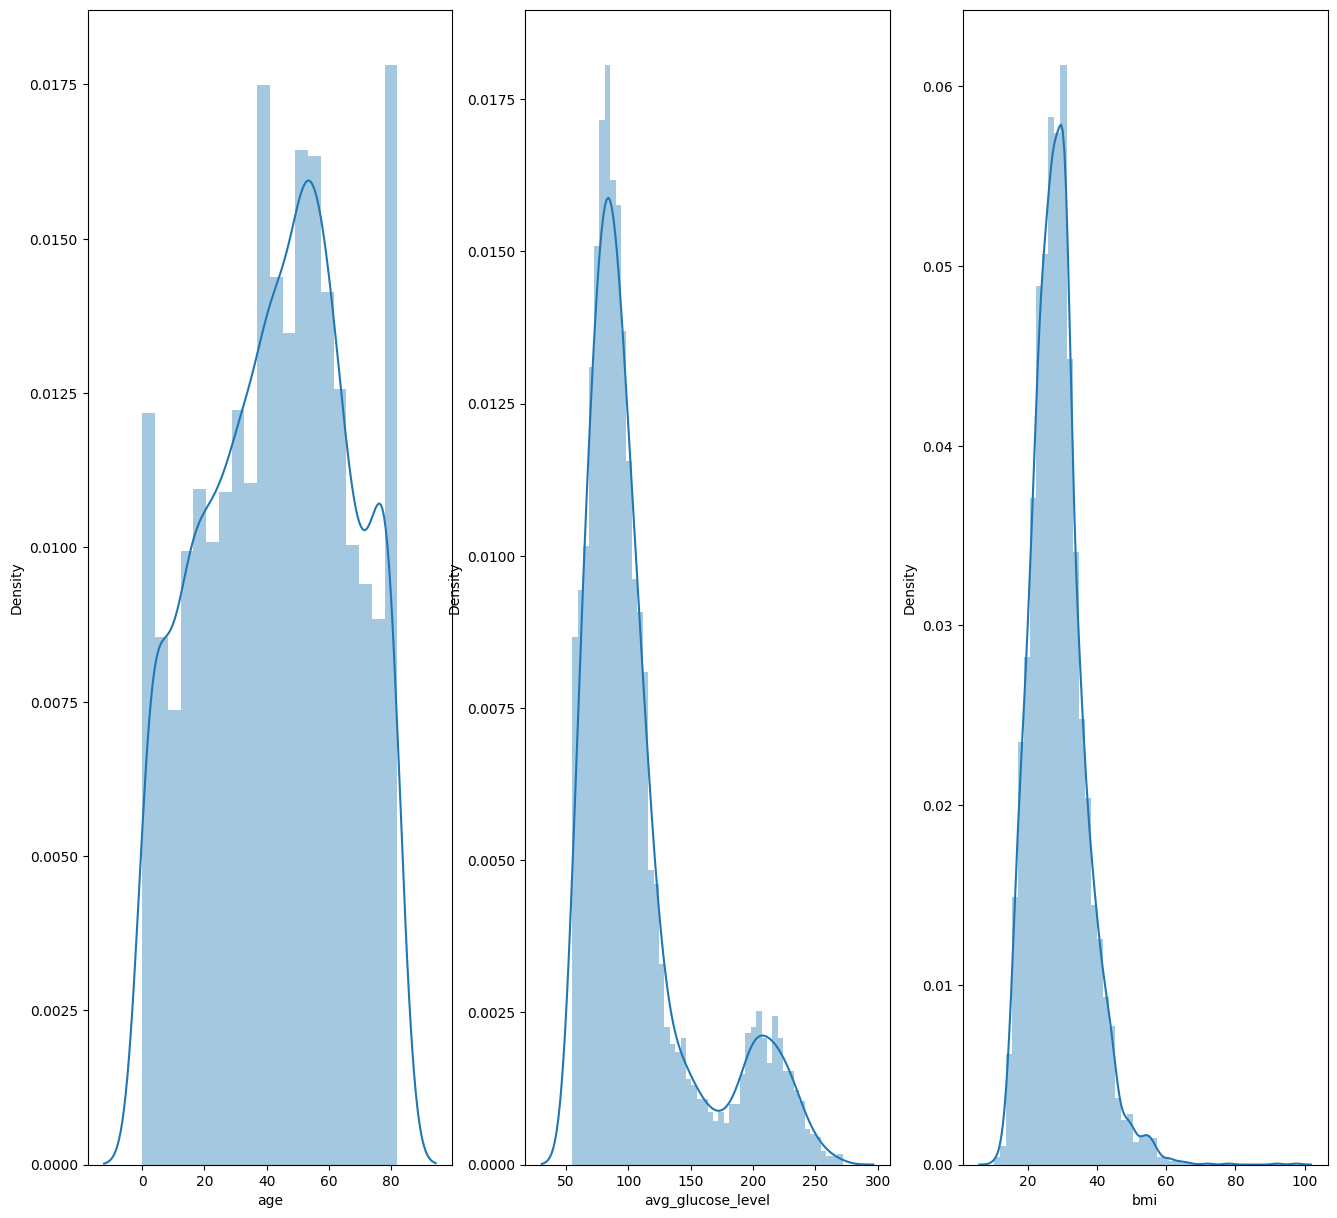

In [15]:
## Numerical columns -> age, avg_glucose_level, bmi
plt.figure(figsize=(16,15))
plt.subplot(1,3,1)
sns.distplot(dataset['age'])

plt.subplot(1,3,2)
sns.distplot(dataset['avg_glucose_level'])

plt.subplot(1,3,3)
sns.distplot(dataset['bmi'])

plt.show()

<Axes: ylabel='age'>

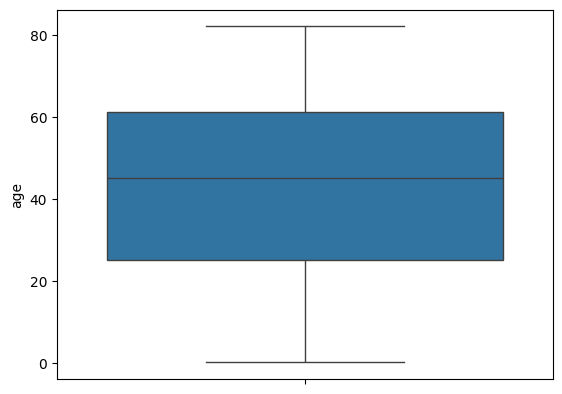

In [16]:
sns.boxplot(dataset['age'])

<Axes: ylabel='avg_glucose_level'>

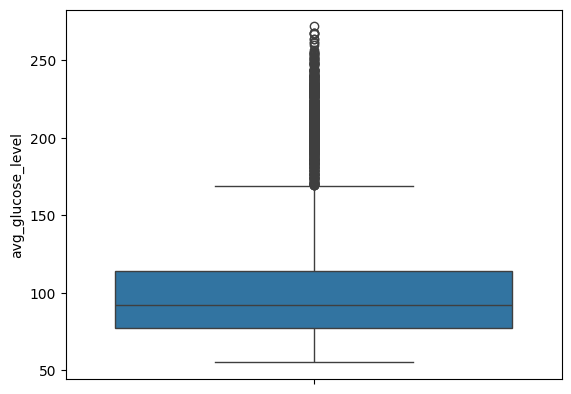

In [17]:
sns.boxplot(dataset['avg_glucose_level'])

<Axes: ylabel='bmi'>

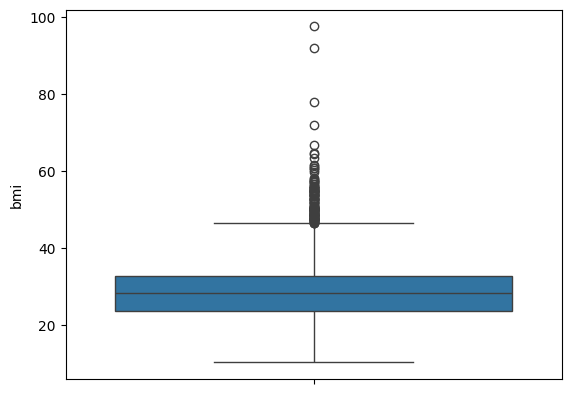

In [18]:
sns.boxplot(dataset['bmi'])

### We can observe that age feature does not contain any outliers. To handle the outliers in other two features, avg_glucose_level and bmi ? We will use SMOTE technique

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X=dataset.drop(columns=['stroke'])
y=dataset['stroke']

x_sm, y_sm = sm.fit_resample(X, y)

In [20]:
outlier = ['avg_glucose_level', 'bmi']
Q1 = dataset[outlier].quantile(0.25)
Q3 = dataset[outlier].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset[outlier]<(Q1-1.5*IQR))|(dataset[outlier]>(Q3+1.5*IQR))).any(axis=1)]
dataset.reset_index(drop=True)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  80.0             0              1             1          2   
1          1  74.0             1              1             1          2   
2          0  69.0             0              0             0          2   
3          0  59.0             0              0             1          2   
4          0  78.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
4389       0  80.0             1              0             1          2   
4390       0  81.0             0              0             1          3   
4391       0  35.0             0              0             1          3   
4392       1  51.0             0              0             1          2   
4393       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level    bmi  smoking_status  stroke  
0                  0             105.92  32.50               2       1  
1                  0              70.09  27.40               2       1  
2                  1              94.39  22.80               2       1  
3                  0              76.15  30.57               0       1  
4                  1              58.57  24.20               0       1  
...              ...                ...    ...             ...     ...  
4389               1              83.75  30.57               2       0  
4390               1             125.20  40.00               2       0  
4391               0              82.99  30.60               2       0  
4392               0             166.29  25.60               1       0  
4393               1              85.28  26.20               0       0  

[4394 rows x 11 columns]

<Axes: ylabel='bmi'>

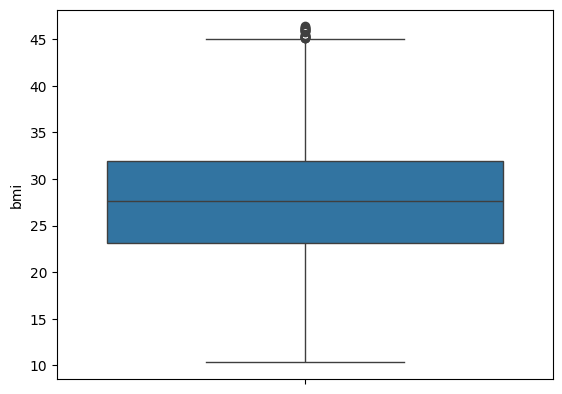

In [21]:
# Now here we can see from box plot that we have almost negligible outliers

sns.boxplot(dataset['bmi'])

<Axes: ylabel='avg_glucose_level'>

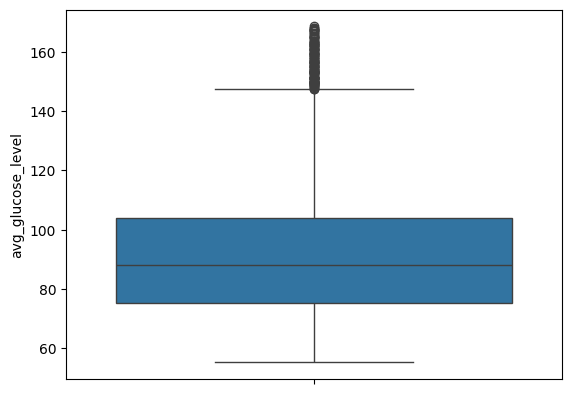

In [22]:
sns.boxplot(dataset['avg_glucose_level'])

# Splitting Dataset

In [25]:
x_sm

gender        age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.000000             0              1             1          2   
1          0  61.000000             0              0             1          3   
2          1  80.000000             0              1             1          2   
3          0  49.000000             0              0             1          2   
4          0  79.000000             1              0             1          3   
...      ...        ...           ...            ...           ...        ...   
9717       0  59.643639             0              0             1          2   
9718       0  74.171106             0              0             1          2   
9719       0  77.499727             0              0             1          2   
9720       0  78.000000             0              0             1          3   
9721       0  40.858045             0              0             1          2   

      Residence_type  avg_glucose_level        bmi  smoking_status  
0                  1         228.690000  36.600000               1  
1                  0         202.210000  30.570000               2  
2                  0         105.920000  32.500000               2  
3                  1         171.230000  34.400000               3  
4                  0         174.120000  24.000000               2  
...              ...                ...        ...             ...  
9717               0         118.812021  35.918365               3  
9718               0         231.607148  34.731182               1  
9719               1         105.979585  31.999453               1  
9720               0         111.156267  29.858946               2  
9721               1          81.896899  27.494458               2  

[9722 rows x 10 columns]

In [27]:
X=dataset.drop(columns=['stroke'])
y=dataset['stroke']

x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,train_size=0.7,random_state=42)


# Models

## Decision Tree

In [28]:
class DecisionTree:
    def __init__(self, max_depth=None):
        """Initialize the DecisionTree class with a specified maximum depth."""
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Fit the decision tree to the training data."""
        self.tree = self._build_tree(X, y, depth=0)

    def calculate_entropy(self,col):
        """Calculate the entropy of a column."""
        data, counts = np.unique(col, return_counts=True)
        N = int(col.shape[0])

        entropy = 0.0

        for count in counts:
            p = count / N
            entropy += p * np.log2(p)

        return -entropy

    def information_gain(self,y, y_left, y_right):
        """Calculates the information gain of a split."""
        parent_entropy = self.calculate_entropy(y)
        left_weight = len(y_left) / len(y)
        right_weight = len(y_right) / len(y)
        child_entropy = left_weight * self.calculate_entropy(y_left) + right_weight * self.calculate_entropy(y_right)
        return parent_entropy - child_entropy

    def _build_tree(self, X, y, depth):
        """Recursively builds the decision tree."""
        if depth == self.max_depth or len(set(y)) == 1:
            # If max depth reached or pure node ==> leaf node
            return {'class': max(set(y), key=y.tolist().count), 'is_leaf': True}

        best_split_attribute, best_split_value = self._get_best_split(X, y)

        if best_split_attribute is None:
            # information gain = 0 ==> leaf node
            return {'class': max(set(y), key=y.tolist().count), 'is_leaf': True}

        left_indices = X[best_split_attribute] == best_split_value
        right_indices = ~left_indices

        if len(left_indices) == 0 or len(right_indices) == 0:
            # If a split = empty subset ==> leaf node
            return {'class': max(set(y), key=y.tolist().count), 'is_leaf': True}

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            'attribute': best_split_attribute,
            'value': best_split_value,
            'left': left_subtree,
            'right': right_subtree,
            'is_leaf': False
        }

    def _get_best_split(self, X, y):
        """Finding the best split for the decision tree."""
        best_information_gain = 0
        best_split_attribute = None
        best_split_value = None

        for feature in X.columns:
            categories = X[feature].unique()
            for category in categories:
                left_indices = X[feature] == category
                right_indices = ~left_indices

                y_left, y_right = y[left_indices], y[right_indices]
                current_information_gain = self.information_gain(y, y_left, y_right)

                if current_information_gain > best_information_gain:
                    best_information_gain = current_information_gain
                    best_split_attribute = feature
                    best_split_value = category

        return best_split_attribute, best_split_value

    def predict(self, X):
        """Predicts the classes of input samples."""
        if self.tree is None:
            raise ValueError("The decision tree has not been fitted yet.")

        return np.array([self._traverse_tree(x, self.tree) for _, x in X.iterrows()])

    def _traverse_tree(self, sample, node):
        """Traverses the decision tree to predict the class of a sample."""
        while not node['is_leaf']:
            attribute = node['attribute']
            value = node['value']

            if sample[attribute] == value:
                node = node['left']
            else:
                node = node['right']

        return node['class']


In [29]:
max_depth_values = [3, 5, 7, 10]

# Perform hyperparameter tuning
best_accuracy = 0
best_max_depth = None
best=None
for max_depth in max_depth_values:
    dt = DecisionTree(max_depth=max_depth)
    dt.fit(x_train, y_train)
    accuracy = accuracy_score(y_train,dt.predict(x_train))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
        best=dt


y_predicted = best.predict(x_test)

# evaluation
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7233459033253342
Precision: 0.6982392228293868
Recall: 0.7876712328767124
F1-score: 0.7402639201802381


In [52]:
test_sample = x_test.iloc[4,:]

test_sample = test_sample.to_frame()
test_sample

9139
gender               1.000000
age                 71.233323
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level  217.156212
bmi                 31.117768
smoking_status       1.000000

In [62]:
y_test.iloc[1]

1

In [54]:
predictions = dt.predict(x_test)

In [56]:
predictions[4]

1

In [33]:
joblib.dump(dt, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [59]:
loaded_model = joblib.load(r'Model\decision_tree_model.pkl')

prediction = loaded_model.predict(x_test)

In [60]:
prediction

array([0, 1, 0, ..., 0, 0, 1])

In [61]:
x_test.to_csv('x_test.csv', index=False)

## K-Nearest Neighbours

In [26]:
class KNN():
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train

    def calculate_euclidean(self, sample1, sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance += (sample1[i] - sample2[i]) ** 2
        return (distance) ** (1 / 2)

    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            distances.append((self.y_train.iloc[i], self.calculate_euclidean(self.x_train.iloc[i], test_sample)))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors

    def predict(self, test_set):
        predictions = []
        for index, test_sample in test_set.iterrows():
            neighbors = self.nearest_neighbors(test_sample)
            # Count the occurrences of each label
            label_counts = {}
            for label in neighbors:
                if label in label_counts:
                    label_counts[label] += 1
                else:
                    label_counts[label] = 1
            # Find the label with the highest count
            max_count = 0
            max_label = None
            for label, count in label_counts.items():
                if count > max_count:
                    max_count = count
                    max_label = label
            predictions.append(max_label)
        return predictions


In [27]:
knn = KNN(3)
knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9341161121983039
Precision: 0.25
Recall: 0.06741573033707865
F1-score: 0.10619469026548672


## Naive Bayes

In [63]:
class NaiveBayes:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X, y):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X must be a pandas DataFrame")
        if not isinstance(y, pd.Series):
            raise ValueError("y must be a pandas Series")

        self.class_probabilities = self.calculate_class_probabilities(y)
        self.feature_probabilities = self.calculate_feature_probabilities(X, y)

    def calculate_class_probabilities(self, y):
        class_counts = {}
        total_samples = len(y)
        for label in y.unique():
            class_counts[label] = np.sum(y == label) / total_samples
        return class_counts

    def calculate_feature_probabilities(self, X, y):
        feature_probabilities = {}
        for label in y.unique():
            label_indices = y[y == label].index
            label_data = X.loc[label_indices]
            feature_probabilities[label] = {
                'mean': label_data.mean(),
                'std': label_data.std() + 1e-6  # Adding a small value to avoid division by zero
            }
        return feature_probabilities

    def calculate_likelihood(self, x, mean, std):
        return np.exp(-((x - mean) ** 2) / (2 * std ** 2)) / (np.sqrt(2 * np.pi) * std)

    def predict_proba(self, X):
        probabilities = []
        for x in X.values:
            class_probabilities = {}
            for label, class_prob in self.class_probabilities.items():
                feature_probs = self.feature_probabilities[label]
                likelihoods = self.calculate_likelihood(x, feature_probs['mean'], feature_probs['std'])
                class_probabilities[label] = np.prod(likelihoods) * class_prob
            probabilities.append(class_probabilities)
        return probabilities

    def predict(self, X):
        probas = self.predict_proba(X)
        predictions = []
        for proba in probas:
            predictions.append(max(proba, key=proba.get))
        return predictions

In [64]:
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train)
y_predicted = naive_bayes.predict(x_test)

# evaluation
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.789166952348303
Precision: 0.7571515520389531
Recall: 0.852054794520548
F1-score: 0.8018047051240734


In [66]:
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']

## Random Forest

In [ ]:
import numpy as np
from tqdm import tqdm


class RandomForest:
    def __init__(self, n_estimators=1, max_depth=None, bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.bootstrap = bootstrap
        self.trees = []

    def fit(self, X, y):
        for _ in tqdm(range(self.n_estimators), desc="Fitting Random Forest"):
            tree = DecisionTree(max_depth=self.max_depth)
            if self.bootstrap:
                indices = np.random.choice(len(X), len(X), replace=True)
                X_bootstrap = X.iloc[indices]  # Use iloc for indexing DataFrame by integer location
                y_bootstrap = y.iloc[indices]
            else:
                X_bootstrap = X
                y_bootstrap = y
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)



In [ ]:
rf = RandomForest()
rf.fit(x_train, y_train)
y_predicted = rf.predict(x_test)

#convert continous to discrete class labels
y_predicted_binary = (y_predicted > 0.5).astype(int)

# evaluation
accuracy = accuracy_score(y_test, y_predicted_binary)
precision = precision_score(y_test, y_predicted_binary)
recall = recall_score(y_test, y_predicted_binary)
f1 = f1_score(y_test, y_predicted_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
